In [14]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

## Playing around
Trying to crop the images and find the closest resolution to somthing divisible by 32

In [9]:
# Load the image
image1 = cv2.imread("../data/raw/images/8013620831-0038.jpg-b.jpg")
image2 = cv2.imread("../data/raw/images/8013620831-0054.jpg-b.jpg")

# Get image resolution
print("Image 1 resolution: ", image1.shape)
print("Image 2 resolution: ", image2.shape)

Image 1 resolution:  (2697, 3577, 3)
Image 2 resolution:  (2687, 3516, 3)


In [ ]:
image3 = "/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/8013620831-0029.jpg-b.jpg"
image4 = "/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/8013620831-0030.jpg-b.jpg"
image5 = "/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/8013620831-0031.jpg-b.jpg"
image6 = "/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/8013620831-0032.jpg-b.jpg"
image7 = "/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/8013620831-0033.jpg-b.jpg"
image8 = "/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/8013620831-0034.jpg-b.jpg"
image9 = "/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/8013620831-0035.jpg-b.jpg"
image10 = "/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/8013620831-0036.jpg-b.jpg"
image11 = "/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/8013620831-0037.jpg-b.jpg"

find_common_resolution_divisible_by_32([image3, image4, image5, image6, image7, image8, image9, image10, image11, image1, image2])

In [ ]:
bottom = find_common_resolution_for_b_images("/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/")
top = find_common_resolution_for_t_images("/Users/sofusbjorn/piratbog/data/Mathiesen-single-pages/")

print(f"Common resolution divisible by 32 for bottom images: {bottom}")
print(f"Common resolution divisible by 32 for top images: {top}")

In [ ]:
def find_common_resolution_divisible_by_32(image_paths):
    """
    Finds the closest common resolution divisible by 32 for a list of images,
    ensuring the resolution is less than or equal to all image dimensions.
    """
    # Store the dimensions of all images
    dimensions = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        height, width, _ = image.shape
        dimensions.append((width, height))
    
    # Find the smallest width and height across all images
    min_width = min(dim[0] for dim in dimensions)
    min_height = min(dim[1] for dim in dimensions)
    
    # Adjust dimensions to be divisible by 32 while ensuring they remain <= smallest image dimensions
    common_width = ((min_width // 32) * 32)
    common_height = ((min_height // 32) * 32)
    
    # Ensure the common resolution is <= dimensions of all images
    for width, height in dimensions:
        if common_width > width or common_height > height:
            common_width = ((width // 32) * 32)
            common_height = ((height // 32) * 32)

    return common_width, common_height


image1 = "data/images/8013620831-0038.jpg-b.jpg"
image2 = "data/images/8013620831-0054.jpg-b.jpg"

image_paths = [image1, image2]  # Replace with your image paths
common_resolution = find_common_resolution_divisible_by_32(image_paths)
print(f"Common resolution divisible by 32 for all images: {common_resolution}")


In [ ]:
def find_common_resolution_divisible_by_32_from_folder(folder_path, suffix):
    """
    Finds the closest common resolution divisible by 32 for all images in a folder
    that end with the specified suffix.
    """
    # Ensure suffix starts with a dash
    if not suffix.startswith('-'):
        raise ValueError("Suffix should start with '-' (e.g., '-b' or '-t').")
    
    # List all files in the folder and filter for image files with the specified suffix
    image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")  # Add more as needed
    image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path)
                   if file.lower().endswith(image_extensions) and file.lower().endswith(f"{suffix}.jpg")]
    
    if not image_paths:
        raise ValueError(f"No images found in the folder with suffix '{suffix}'.")
    
    # Store the dimensions of all images
    dimensions = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Could not read {image_path}. Skipping.")
            continue
        height, width, _ = image.shape
        dimensions.append((width, height))
    
    if not dimensions:
        raise ValueError(f"No valid images found in the folder with suffix '{suffix}'.")
    
    # Find the smallest width and height across all images
    min_width = min(dim[0] for dim in dimensions)
    min_height = min(dim[1] for dim in dimensions)
    
    # Adjust dimensions to be divisible by 32 while ensuring they remain <= smallest image dimensions
    common_width = ((min_width // 32) * 32)
    common_height = ((min_height // 32) * 32)
    
    # Ensure the common resolution is <= dimensions of all images
    for width, height in dimensions:
        if common_width > width or common_height > height:
            common_width = ((width // 32) * 32)
            common_height = ((height // 32) * 32)

    return common_width, common_height

# Functions for specific suffixes
def find_common_resolution_for_b_images(folder_path):
    return find_common_resolution_divisible_by_32_from_folder(folder_path, "-b")

def find_common_resolution_for_t_images(folder_path):
    return find_common_resolution_divisible_by_32_from_folder(folder_path, "-t")

Checking multiple bottom images!

# Processing data

In [2]:
def common_resolution_divisible_by_32_from_folder(folder_path):
    """
    Finds the closest common resolution divisible by 32 for all images in a folder.
    """
    # List all files in the folder and filter for image files
    image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")  # Add more as needed
    image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path)
                   if file.lower().endswith(image_extensions)]
    
    if not image_paths:
        raise ValueError("No images found in the specified folder.")
    
    # Store the dimensions of all images
    dimensions = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Could not read {image_path}. Skipping.")
            continue
        height, width, _ = image.shape
        dimensions.append((width, height))
    
    if not dimensions:
        raise ValueError("No valid images found in the specified folder.")
    
    # Find the smallest width and height across all images
    min_width = min(dim[0] for dim in dimensions)
    min_height = min(dim[1] for dim in dimensions)
    
    # Adjust dimensions to be divisible by 32 while ensuring they remain <= smallest image dimensions
    common_width = ((min_width // 32) * 32)
    common_height = ((min_height // 32) * 32)
    
    # Ensure the common resolution is <= dimensions of all images
    for width, height in dimensions:
        if common_width > width or common_height > height:
            common_width = ((width // 32) * 32)
            common_height = ((height // 32) * 32)

    return common_width, common_height

Lets check all the images and find the closest resolution to somthing divisible by 32

one for bottom and top images

In [3]:
def crop_image_t(image_path, output_path, target_width, target_height):
    with Image.open(image_path) as img:
        width, height = img.size

        # Calculate crop dimensions
        left = (width - target_width) // 2
        right = left + target_width
        top = height - target_height
        bottom = height

        # Ensure dimensions are valid
        if left < 0 or top < 0 or right > width or bottom > height:
            print(f"Image {image_path} is too small to crop to the specified resolution.")
            return

        # Crop and save the image
        cropped_img = img.crop((left, top, right, bottom))
        cropped_img.save(output_path)
        #print(f"Cropped {image_path} to {output_path}")

In [4]:
def crop_image_b(image_path, output_path, target_width, target_height):
    with Image.open(image_path) as img:
        width, height = img.size

        # Calculate crop dimensions
        left = (width - target_width) // 2
        right = left + target_width
        top = 0  # Start from the top
        bottom = target_height  # Keep only up to the target height

        # Ensure dimensions are valid
        if left < 0 or right > width or bottom > height:
            print(f"Image {image_path} is too small to crop to the specified resolution.")
            return

        # Crop and save the image
        cropped_img = img.crop((left, top, right, bottom))
        cropped_img.save(output_path)
        #print(f"Cropped {image_path} to {output_path}")

In [5]:
input_folder = "../data/raw/Mathiesen-single-pages"

target_width, target_height = common_resolution_divisible_by_32_from_folder(input_folder)
print(target_width, target_height)

NameError: name 'os' is not defined

3200 2496

In [8]:
def crop(input_folder, output_t, output_b):
    os.makedirs(output_t, exist_ok=True)
    os.makedirs(output_b, exist_ok=True)
    for filename in os.listdir(input_folder):
        if "-t" in filename:
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_t, filename)
            crop_image_t(input_path, output_path, target_width, target_height)
        elif "-b" in filename:
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_b, filename)
            crop_image_b(input_path, output_path, target_width, target_height)
    print("Cropping completed.")


In [9]:
masks_in = "../data/raw/masks"
masks_out = "../data/processed/masks"
img_in = "../data/raw/images"
img_out = "../data/processed/images"

crop(masks_in, masks_out, masks_out)
crop(img_in, img_out, img_out)

Cropping completed.
Cropping completed.


# Selecting perfectly cropped data

We need to sort our images in two piles. One for if there is black any black pixels in the top row, and one for if there is any black pixels in the bottom row.
This should help us to find the images where the crop has cropped data.

In [2]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
target_size = (3200 // 2, 2496 // 2)

In [4]:
img_faulty = cv2.imread("../data/processed/Mathiesen-single-pages/top/8013620831-0035.jpg-t.jpg")
img_allowed = cv2.imread("../data/processed/Mathiesen-single-pages/top/8013620831-0816.jpg-t.jpg")

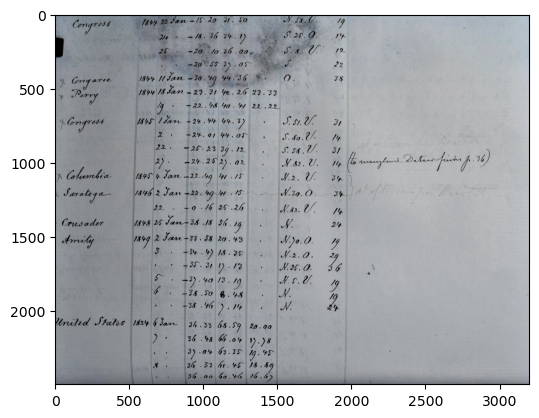

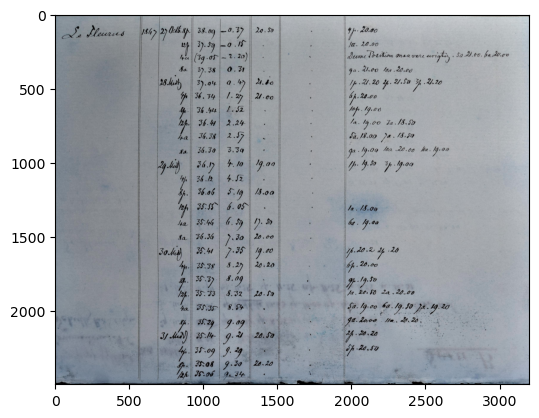

In [72]:
plt.imshow(img_faulty)
plt.show()
plt.imshow(img_allowed)
plt.show()

Adding a constant rectangle

In [114]:
def add_rectangle(img):
    width, height = img.shape[1], img.shape[0]
    color = (255,255,255)   
    start_point_left = (0, 0)
    end_point_left = (math.floor(width*0.08), height)
    img = cv2.rectangle(img, start_point_left, end_point_left, color, -1)

    return img

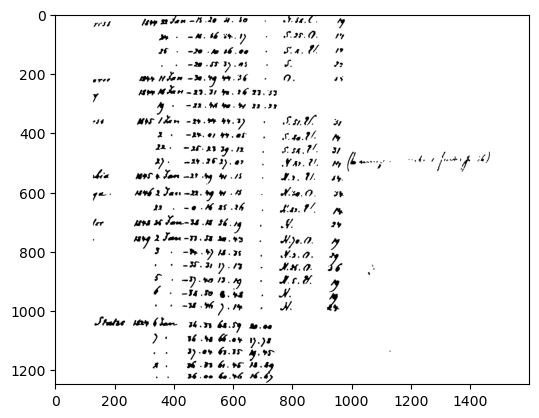

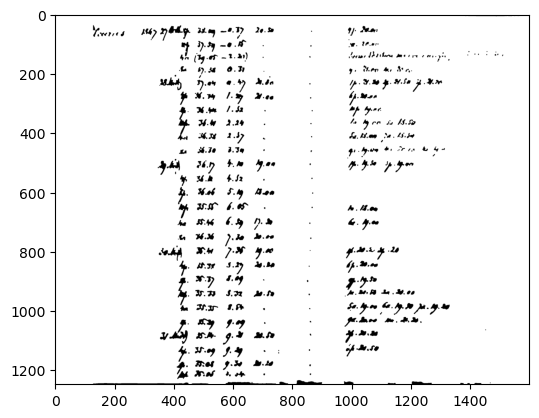

In [115]:
def preprocess(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #will be added
    _, img = cv2.threshold(img, 25, 255, cv2.THRESH_BINARY)

    erode_kernel = np.ones((3, 3), np.uint8)
    img = cv2.erode(img, erode_kernel, iterations=5)

    dilate_kernel = np.ones((3, 3), np.uint8)
    img = cv2.dilate(img, dilate_kernel, iterations=3)

    img = add_rectangle(img)

    img = img / 255.0
    img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

    return img

img_faulty_preprocessed = preprocess(img_faulty)
img_allowed_preprocessed = preprocess(img_allowed)

plt.imshow(img_faulty_preprocessed, cmap='gray')
plt.show()

plt.imshow(img_allowed_preprocessed, cmap='gray')
plt.show()

Looking for the left most and rightmost (relevant) column-lines, and removing everything but that

In [116]:
def find_vertical_line_bounds(img):
    """Find the leftmost and rightmost vertical lines in left half of image"""
    # Create a copy for vertical line detection
    vertical = np.copy(img)
    
    # nothing relevant on right-half of image.
    half = img.shape[1] // 2
    vertical = vertical[:, :half]
    
    # Enhance vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 50))
    vertical = cv2.morphologyEx(vertical, cv2.MORPH_CLOSE, vertical_kernel)
    
    # Sum along vertical axis to get column profile
    col_profile = np.sum(vertical == 0, axis=0)  # Sum black pixels
    
    # Find columns with significant vertical lines
    threshold = np.max(col_profile) * 0.15  # Adjust this threshold if needed
    line_cols = np.where(col_profile > threshold)[0]
    
    if len(line_cols) > 1:  # Make sure we have at least 2 lines
        left_bound = max(0, line_cols[0] - 10)  # Add small padding

        right_bound = min(half, line_cols[-1] -5)  # Use last line found in left half
        return left_bound, right_bound
    
    return 0, img.shape[1]

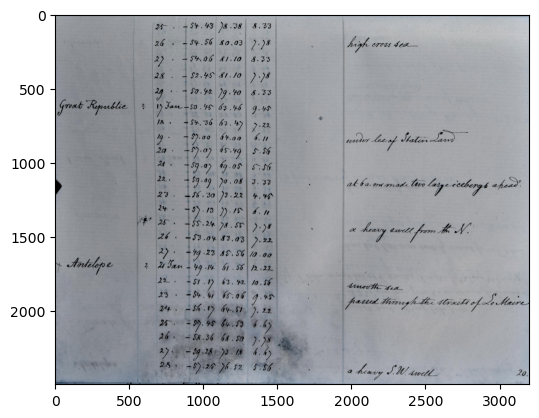

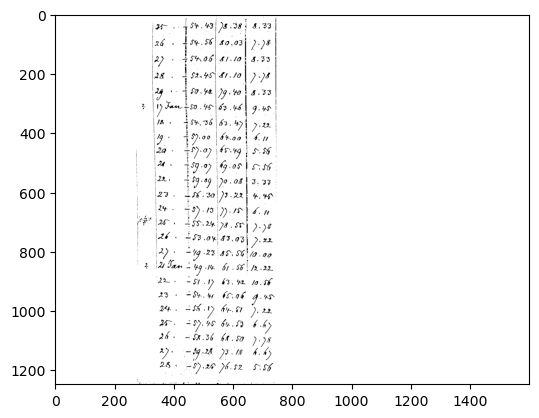

In [117]:
def preprocess(img, BS=13, C=12):
    """Modified preprocessing pipeline with vertical line removal"""

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, blockSize=BS, C=C
    )
    img = add_rectangle(img)
    
    # Clean noise
    kernel = np.ones((3,3), np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)
    
    left_bound, right_bound = find_vertical_line_bounds(img)
    
    # Apply bounds
    img[:, :left_bound] = 255
    img[:, right_bound:] = 255
    
    # Normalize and resize
    img = img.astype(float) / 255.0
    img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
    
    return img

img_sloppy = cv2.imread("../data/processed/train/images/8013620831-0048.jpg-b.jpg")
img_sloppy_preprocessed = preprocess(img_sloppy)
plt.imshow(img_sloppy)
plt.show()
plt.imshow(img_sloppy_preprocessed, cmap='gray')
plt.show()



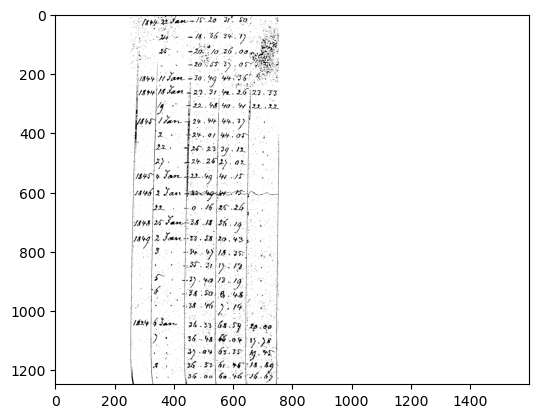

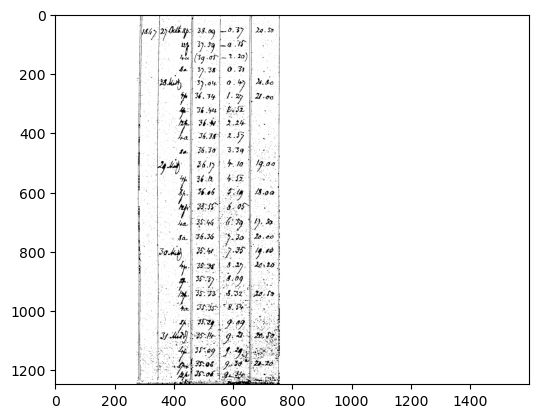

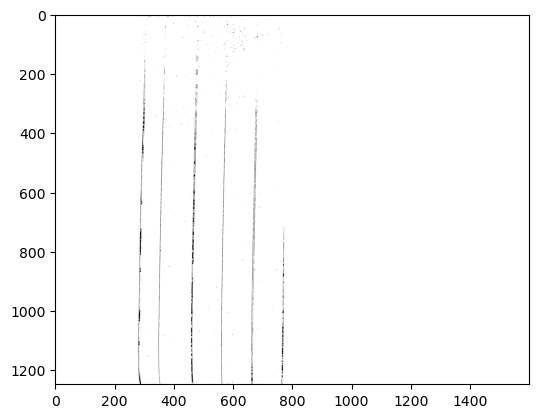

In [51]:
img_faulty_preprocessed = preprocess(img_faulty, 7, 4)
img_allowed_preprocessed = preprocess(img_allowed, 7, 3)
img_white = cv2.imread("../data/processed/Mathiesen-single-pages/top/8013620831-0077.jpg-t.jpg")
img_white_preprocessed = preprocess(img_white, 13, 12)

plt.imshow(img_faulty_preprocessed, cmap='gray')
plt.show()

plt.imshow(img_allowed_preprocessed, cmap='gray')
plt.show()

plt.imshow(img_white_preprocessed, cmap='gray')
plt.show()